In [301]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# - Separate images in train and test into two groups as DR and nonDR:
# o NonDR : Label 0
# o DR : Label 3 & Label 4 (You don’t need to use Label 1 and Label 2)

image_files = [f for f in os.listdir("Test") if os.path.isfile(os.path.join("Test", f))]

testnonDR = []
testDR = []

for image in image_files:
  label = image.split("-")[1].split('.')[0]
  # nonDR
  if (label == "0"):
    testnonDR.append((os.path.join("Test",image), 0))
  elif (label == "3" or label == "4"):
    testDR.append((os.path.join("Test",image), 1))

image_files = [f for f in os.listdir("Train") if os.path.isfile(os.path.join("Train", f))]

trainnonDR = []
trainDR = []

for image in image_files:
  label = image.split("-")[1].split('.')[0]
  # nonDR
  if (label == "0"):
    trainnonDR.append((os.path.join("Train",image), 0))
  elif (label == "3" or label == "4"):
    trainDR.append((os.path.join("Train",image), 1))


## Montage Train DR

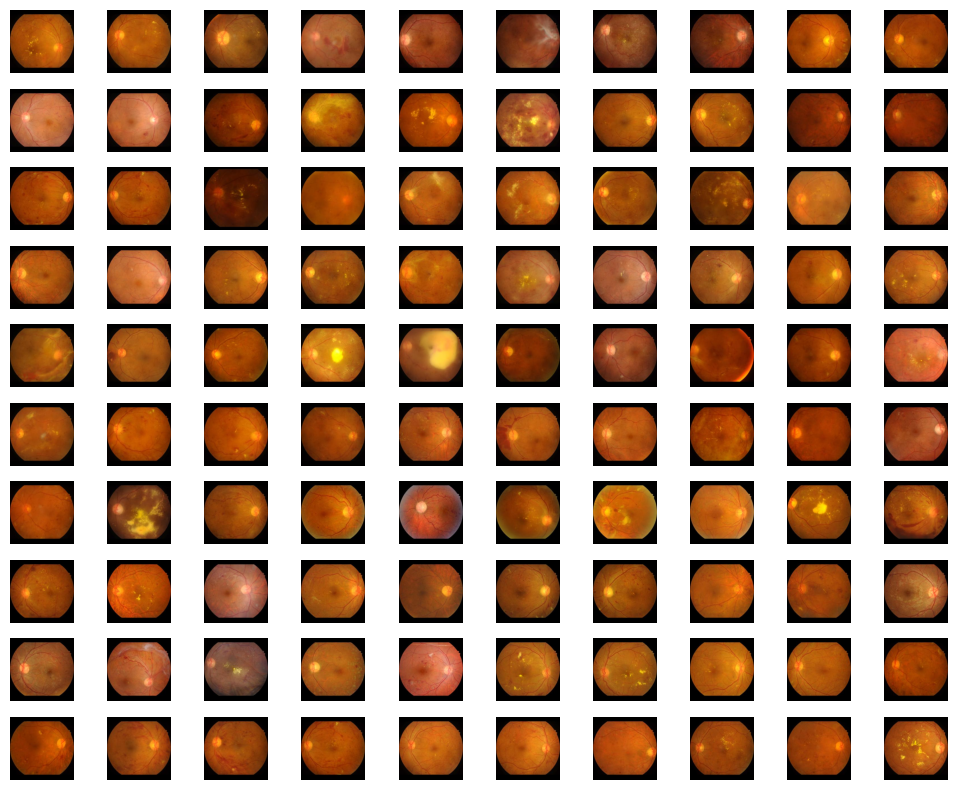

In [302]:
fig, axes = plt.subplots(10, 10, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(mpimg.imread(trainDR[i][0]), cmap='gray')
  ax.axis('off')
  
plt.tight_layout()
plt.show()

## Montage Train non DR

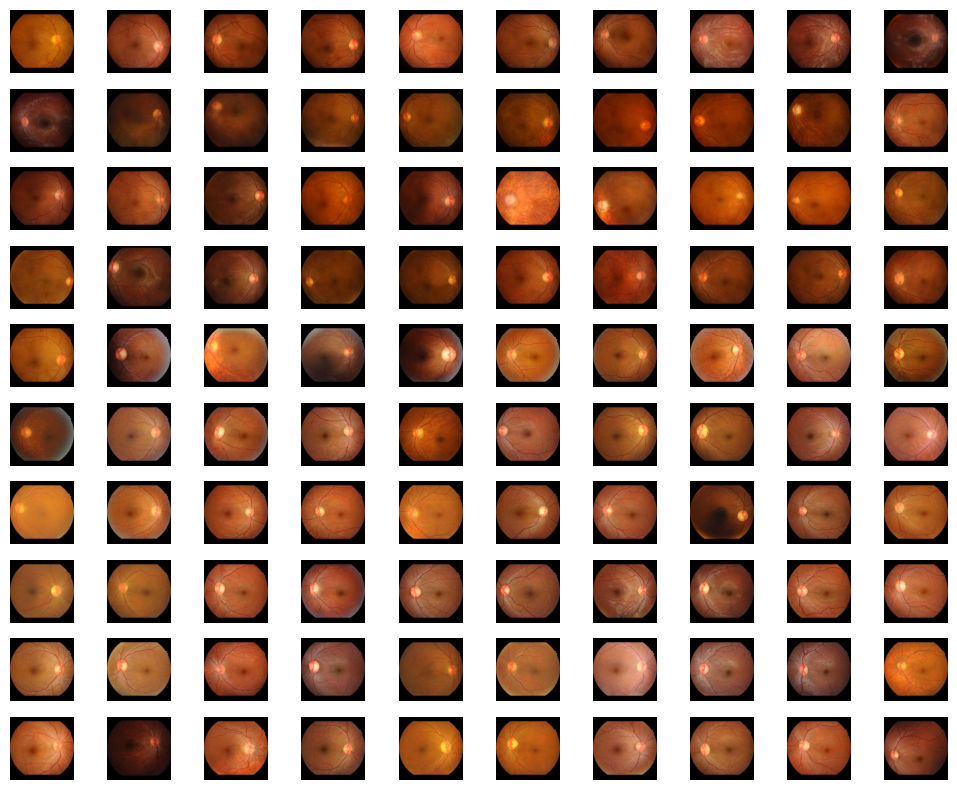

In [303]:
fig, axes = plt.subplots(10, 10, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(mpimg.imread(trainnonDR[i][0]), cmap='gray')
  ax.axis('off')

plt.tight_layout()
plt.show()

## Montage Test DR

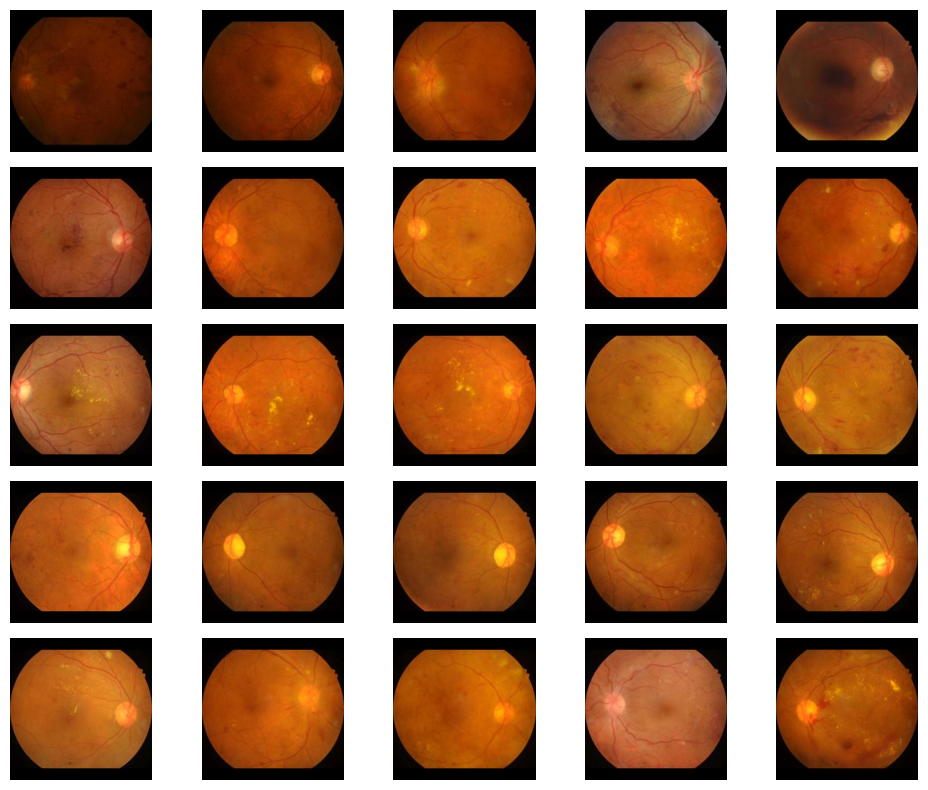

In [304]:
fig, axes = plt.subplots(5, 5, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(mpimg.imread(testDR[i][0]), cmap='gray')
  ax.axis('off')

plt.tight_layout()
plt.show()

## Montage Test non Dr

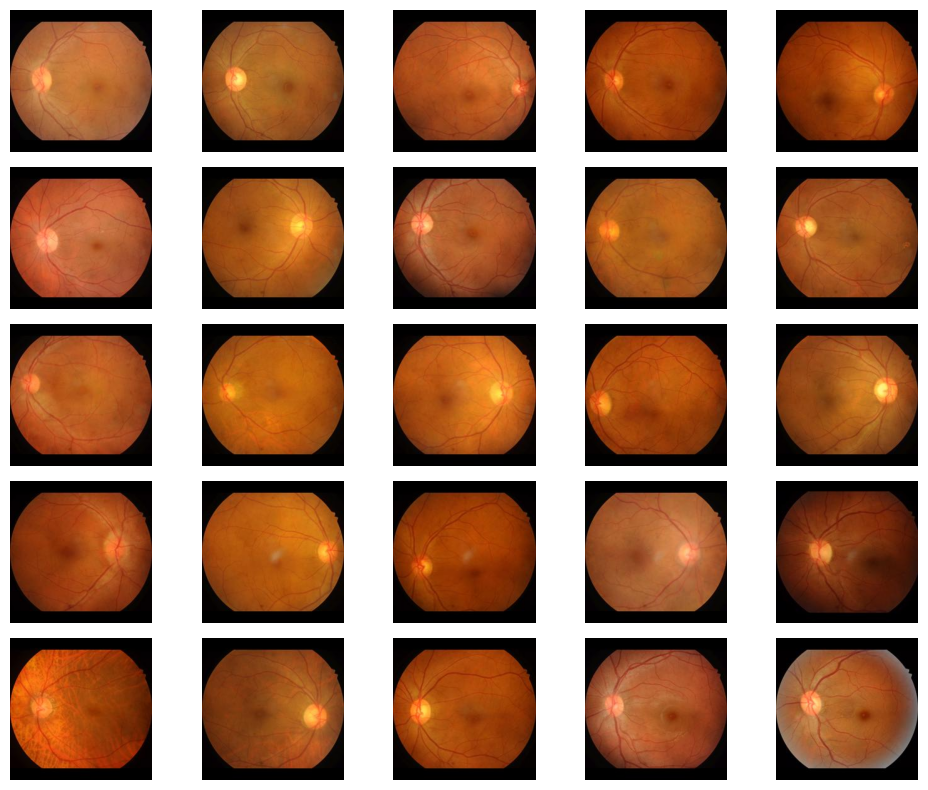

In [305]:
fig, axes = plt.subplots(5, 5, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(mpimg.imread(testnonDR[i][0]), cmap='gray')
  ax.axis('off')

plt.tight_layout()
plt.show()

## Merge label 0 and label 3-4


In [306]:
import random

trainSet = trainDR + trainnonDR
random.shuffle(trainSet)

testSet = testDR + testnonDR
random.shuffle(testSet)


## Download Pretained AlexNet from pytorch

In [307]:
import torch
import torchvision.models as models

model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = torch.nn.Linear(model.fc.in_features, 2)

In [308]:
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

transform = transforms.Compose([
  transforms.Resize((224,224)),
  transforms.ToTensor(),
])

for i in range(len(trainSet)):
  img = Image.open(trainSet[i][0])
  img = transform(img)

  trainSet[i] = (img, trainSet[i][1])


In [309]:
for i in range(len(testSet)):
  img = Image.open(testSet[i][0])
  img = transform(img)

  testSet[i] = (img, testSet[i][1])


In [310]:
train_loader = DataLoader(trainSet, batch_size=32, shuffle=True)
test_loader = DataLoader(testSet, batch_size=32, shuffle=True)

## resnet18 0.00001 learning rate 50 epochs 

In [311]:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

for epoch in range(50):
  model.train()

  running_loss = 0

  for inputs, labels in train_loader:
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  running_loss += loss.item()

  print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainSet)}')

Epoch 1, Loss: 0.003979040954827335
Epoch 2, Loss: 0.003750155640019517
Epoch 3, Loss: 0.002033684272246602
Epoch 4, Loss: 0.0030683944661329694
Epoch 5, Loss: 0.002543058608756455
Epoch 6, Loss: 0.002931990280225583
Epoch 7, Loss: 0.0028892753189175974
Epoch 8, Loss: 0.003243433594239825
Epoch 9, Loss: 0.003143631530642973
Epoch 10, Loss: 0.0027715327210927287
Epoch 11, Loss: 0.0024575523829181833
Epoch 12, Loss: 0.0023910129580516294
Epoch 13, Loss: 0.0024291942555616803
Epoch 14, Loss: 0.0023222514627508615
Epoch 15, Loss: 0.002478572413151366
Epoch 16, Loss: 0.0033562958008584347
Epoch 17, Loss: 0.003717732568659207
Epoch 18, Loss: 0.0038745278050463486
Epoch 19, Loss: 0.001667392508992889
Epoch 20, Loss: 0.0036924970752998084
Epoch 21, Loss: 0.0013029080188691848
Epoch 22, Loss: 0.0014445296985166082
Epoch 23, Loss: 0.0013958163530446211
Epoch 24, Loss: 0.004078942514115271
Epoch 25, Loss: 0.003914051018800253
Epoch 26, Loss: 0.006035046354805913
Epoch 27, Loss: 0.0012079335836121

In [312]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
  for inputs, label in test_loader:
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += len(label)
    print(predicted)
    correct += (predicted == label).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

tensor([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 0])
tensor([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1])
tensor([0, 0])
Accuracy of the model on the test images: 87.88%


## resnet18 0.00001 learning rate 100 epochs 

In [317]:
# reset model
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = torch.nn.Linear(model.fc.in_features, 2)

In [318]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)

for epoch in range(100):
  model.train()

  running_loss = 0

  for inputs, labels in train_loader:
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  running_loss += loss.item()

  print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainSet)}')

model.eval()

correct = 0
total = 0

with torch.no_grad():
  for inputs, label in test_loader:
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += len(label)
    print(predicted)
    correct += (predicted == label).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Epoch 1, Loss: 0.003367181418006986
Epoch 2, Loss: 0.003274787724713871
Epoch 3, Loss: 0.0024337158592758474
Epoch 4, Loss: 0.002631116701935052
Epoch 5, Loss: 0.0024942651333048184
Epoch 6, Loss: 0.0032738906400212983
Epoch 7, Loss: 0.003392056964250854
Epoch 8, Loss: 0.0018793405957722943
Epoch 9, Loss: 0.0017234047563159513
Epoch 10, Loss: 0.0017093696019065056
Epoch 11, Loss: 0.0038820461076521226
Epoch 12, Loss: 0.004237439381937109
Epoch 13, Loss: 0.001403989263081829
Epoch 14, Loss: 0.004784800199219225
Epoch 15, Loss: 0.004576498432382071
Epoch 16, Loss: 0.0013413256476361463
Epoch 17, Loss: 0.0013709554180560872
Epoch 18, Loss: 0.004447110895980657
Epoch 19, Loss: 0.0012905172104965387
Epoch 20, Loss: 0.004211737024181084
Epoch 21, Loss: 0.0012847804373804232
Epoch 22, Loss: 0.004273584380687907
Epoch 23, Loss: 0.004004898238274838
Epoch 24, Loss: 0.0017216785408643433
Epoch 25, Loss: 0.003612162770000413
Epoch 26, Loss: 0.003189810055239191
Epoch 27, Loss: 0.00212435290971154

## resnet18 0.00001 learning rate 75 epochs 

In [321]:
# reset model
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = torch.nn.Linear(model.fc.in_features, 2)

optimizer = optim.Adam(model.parameters(), lr=0.00001)

for epoch in range(75):
  model.train()

  running_loss = 0

  for inputs, labels in train_loader:
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  running_loss += loss.item()

  print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainSet)}')

model.eval()

correct = 0
total = 0

with torch.no_grad():
  for inputs, label in test_loader:
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += len(label)
    print(predicted)
    correct += (predicted == label).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Epoch 1, Loss: 0.0018907897899123017
Epoch 2, Loss: 0.0019058022749563136
Epoch 3, Loss: 0.003579891145461264
Epoch 4, Loss: 0.0035323795177593306
Epoch 5, Loss: 0.0034616777405200765
Epoch 6, Loss: 0.0021617301243288508
Epoch 7, Loss: 0.002977751804233061
Epoch 8, Loss: 0.0025622900357970004
Epoch 9, Loss: 0.0023845186029426784
Epoch 10, Loss: 0.002884398638506344
Epoch 11, Loss: 0.003306969826323513
Epoch 12, Loss: 0.003290341521979306
Epoch 13, Loss: 0.003259401377073058
Epoch 14, Loss: 0.0021203767928631855
Epoch 15, Loss: 0.002807232656367558
Epoch 16, Loss: 0.002547218178032901
Epoch 17, Loss: 0.0024815872021686242
Epoch 18, Loss: 0.0020970409946219
Epoch 19, Loss: 0.001546251518717072
Epoch 20, Loss: 0.004600640400838295
Epoch 21, Loss: 0.004342324538917393
Epoch 22, Loss: 0.0032634718872693726
Epoch 23, Loss: 0.0017464726815427788
Epoch 24, Loss: 0.0029364374361149533
Epoch 25, Loss: 0.00247048798238257
Epoch 26, Loss: 0.0025541144586258826
Epoch 27, Loss: 0.0018507766352553311

## resnet18 0.0001 learning rate 50 epochs 

In [322]:
# reset model
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = torch.nn.Linear(model.fc.in_features, 2)

optimizer = optim.Adam(model.parameters(), lr=0.0001)

for epoch in range(50):
  model.train()

  running_loss = 0

  for inputs, labels in train_loader:
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  running_loss += loss.item()

  print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainSet)}')

model.eval()

correct = 0
total = 0

with torch.no_grad():
  for inputs, label in test_loader:
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += len(label)
    print(predicted)
    correct += (predicted == label).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Epoch 1, Loss: 0.0014524684805814394
Epoch 2, Loss: 0.002649517838593123
Epoch 3, Loss: 0.001128183148714355
Epoch 4, Loss: 0.008624348658995869
Epoch 5, Loss: 0.010659116715308756
Epoch 6, Loss: 0.01055364942736199
Epoch 7, Loss: 0.007389268522596545
Epoch 8, Loss: 0.001744859181489462
Epoch 9, Loss: 0.0035044803693600668
Epoch 10, Loss: 0.0010896535003231658
Epoch 11, Loss: 0.0007680510152638654
Epoch 12, Loss: 0.007218558500712948
Epoch 13, Loss: 0.0005039646351847667
Epoch 14, Loss: 0.009306877039749799
Epoch 15, Loss: 0.00872166611341187
Epoch 16, Loss: 0.0007290429062416582
Epoch 17, Loss: 0.0013301045514266315
Epoch 18, Loss: 0.002674480356594932
Epoch 19, Loss: 0.004941692612050573
Epoch 20, Loss: 0.000767583397112004
Epoch 21, Loss: 0.0006581556472333024
Epoch 22, Loss: 0.0007491728675040753
Epoch 23, Loss: 0.005106643480085677
Epoch 24, Loss: 0.0024840161494243933
Epoch 25, Loss: 0.001332726575985029
Epoch 26, Loss: 0.008167193557501767
Epoch 27, Loss: 0.00030043341422359305


## Plot ROC curve for the best result and show the confusion matrix.
## resnet18 0.000001 learning rate 50 epochs 

In [324]:
# reset model
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = torch.nn.Linear(model.fc.in_features, 2)

optimizer = optim.Adam(model.parameters(), lr=0.000001)

for epoch in range(50):
  model.train()

  running_loss = 0

  for inputs, labels in train_loader:
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  running_loss += loss.item()

  print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainSet)}')

model.eval()

y_true = []
y_scores = []

# Set model to evaluation mode
model.eval()
with torch.no_grad():
  for inputs, labels in test_loader:
    outputs = model(inputs)
    probabilities = torch.softmax(outputs, dim=1)
    
    y_true.extend(labels.numpy())
    y_scores.extend(probabilities.numpy()[:, 1])

Epoch 1, Loss: 0.002972601452690154
Epoch 2, Loss: 0.0029478003542710834
Epoch 3, Loss: 0.0029348519989488655
Epoch 4, Loss: 0.002885742873997076
Epoch 5, Loss: 0.0029010049100052057
Epoch 6, Loss: 0.002549519566710357
Epoch 7, Loss: 0.002767976156004672
Epoch 8, Loss: 0.0029683122375132043
Epoch 9, Loss: 0.002568285057053028
Epoch 10, Loss: 0.002715041433326929
Epoch 11, Loss: 0.0025690838056779556
Epoch 12, Loss: 0.002724224955191408
Epoch 13, Loss: 0.0026795622903549253
Epoch 14, Loss: 0.0027320484706863817
Epoch 15, Loss: 0.002633232087012859
Epoch 16, Loss: 0.0026438825325279386
Epoch 17, Loss: 0.0026442271726140718
Epoch 18, Loss: 0.0026930860508276797
Epoch 19, Loss: 0.0026550946996369714
Epoch 20, Loss: 0.002700044023387627
Epoch 21, Loss: 0.0025589714254386693
Epoch 22, Loss: 0.002870504958156482
Epoch 23, Loss: 0.0027255455343639804
Epoch 24, Loss: 0.002935999098454932
Epoch 25, Loss: 0.002911213307065259
Epoch 26, Loss: 0.0028979555642094593
Epoch 27, Loss: 0.002585687757929

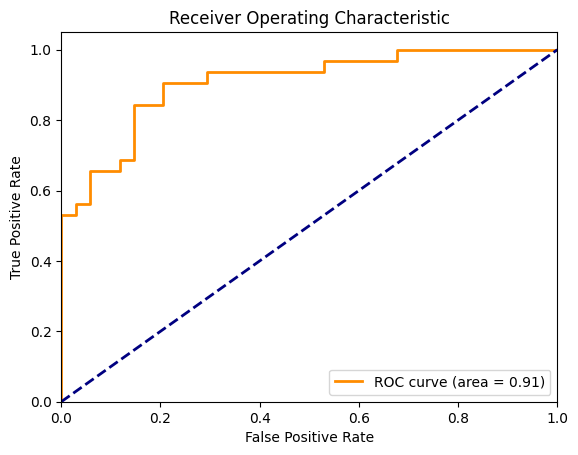

In [329]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


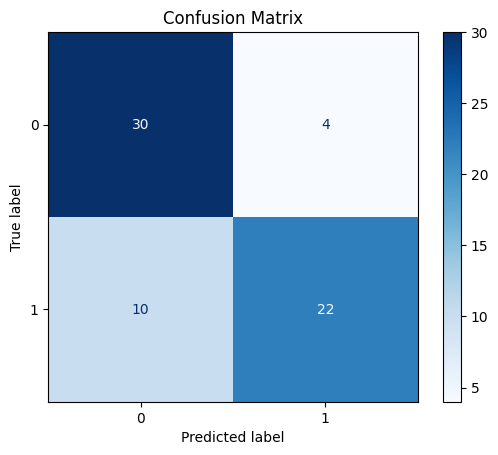

In [327]:
y_pred = np.array([1 if score >= 0.5 else 0 for score in y_scores])
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
